In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import suppression as s
import utils
import linear_model

In [4]:
gaba_fn = 'gaba_data.txt'
supp_fn = 'supp_data_individual_20170427.txt'

In [5]:
sdf = utils.load_psychophys(supp_fn)
gdf = utils.load_gaba(gaba_fn)

In [6]:
plot_dir = "plots/redo-201807"

## Analyze tasks separately (before subsetting to include common subjects)##

In [7]:
pp_subjs = np.unique(sdf.Subject)
n_pp_subjs = len(pp_subjs)
gaba_subjs = np.unique(gdf.subjName)
n_gaba_subjs = len(gaba_subjs)
print(f"Psychophysics subjects (n={n_pp_subjs}):\n", pp_subjs)
print(f"GABA subjects (n={n_gaba_subjs}):\n", gaba_subjs)

Psychophysics subjects (n=37):
 ['ah' 'ai' 'am' 'ap' 'bi' 'bo' 'cl' 'cr' 'ct' 'dl' 'ds' 'eg' 'ei' 'em' 'es'
 'gd' 'gm' 'gw' 'jd' 'jv' 'ke' 'kw' 'li' 'ls' 'mg' 'mk' 'ms' 'mv' 'nl' 'nn'
 'rn' 'sd' 'se' 'tj' 'tm' 'tt' 'yl']
GABA subjects (n=31):
 ['ac' 'ai' 'am' 'as' 'bi' 'ch' 'cr' 'cs' 'ct' 'dl' 'ei' 'em' 'es' 'gd' 'gm'
 'jd' 'jm' 'jv' 'ks' 'kw' 'li' 'ls' 'mg' 'mk' 'ms' 'nl' 'ps' 'rn' 'sd' 'tt'
 'yl']


# GABA only analyses

### GABA t-test, CON v AMB

In [8]:
pop_group = gdf.groupby("Population")
pop_group.describe()

GABA                                                           
           count      mean       std    min     25%     50%      75%    max
Population                                                                 
Amblyope    16.0  0.202312  0.013385  0.179  0.1925  0.2025  0.21125  0.227
Control     15.0  0.206333  0.016482  0.173  0.1925  0.2110  0.21650  0.228

In [9]:
gaba_per_group = [col for col_name, col in pop_group['GABA']]
(tstat, pval) = st.ttest_ind(*gaba_per_group)
print(tstat, pval)

-0.747810754413 0.460595837907


** Thus we find no significant difference in GABA levels between CON and AMB. **

### GABA violin plot, all subjects

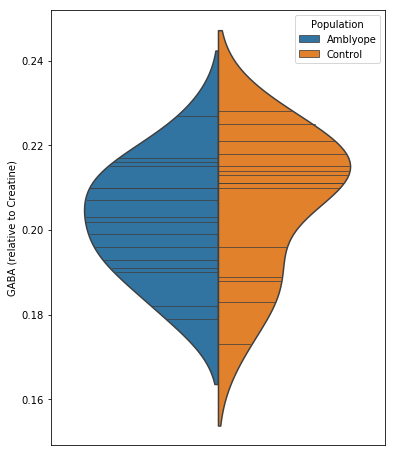

In [10]:
with s.PdfPages(f"{plot_dir}/gaba_diffs_n{n_gaba_subjs}.pdf") as pdf:
    fig = plt.figure(figsize=(6,8))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    ax = sns.violinplot(y='GABA',x='Presentation',hue='Population',data=gdf,split=True,inner='stick',ax=ax)
    ax.xaxis.set_visible(False)
    ax.set_ylabel("GABA (relative to Creatine)")
    plt.show(ax.figure)
    pdf.savefig(ax.figure)
    plt.close(ax.figure)
    plt.close('all')

# Select one psychophysical task's data #

In [11]:
task = 'SS'
sdf = sdf[sdf['Task']==task]

## Find the RelMaskContrast at which NDE and DE most different within population using t-tests

### New way, moving the old way to functions in utils.py, 7-12-18

In [12]:
gvars_test = ['Task','Orientation','Presentation','Population']
# equal_var=False makes it Welch's t-test, which does not assume the grooups have equal variance
df_to_model = utils.find_xvalue_to_predict(sdf, gvars_test, test_func=st.ttest_ind, equal_var=False)

There are 8 bins in this condition.
('SS', 'Cross', 'nDicho', 'Amblyope', 1), Bin Center at RelMaskContrast=0.792
[ 1.921  1.434  0.805  1.043] <= NDE ThreshElevs, n=4
[ 0.947  1.026  0.807] <= DE ThreshElevs, n=3
('SS', 'Cross', 'nDicho', 'Amblyope', 1), Bin Center at RelMaskContrast=0.792
[ 1.921  1.434  0.805  1.043] <= NDE ThreshElevs, n=4
[ 0.947  1.026  0.807] <= DE ThreshElevs, n=3
('SS', 'Cross', 'nDicho', 'Amblyope', 2), Bin Center at RelMaskContrast=1.432
[ 1.23   1.056  1.057  2.058  1.112  1.755  0.888  1.296  1.229  1.076] <= NDE ThreshElevs, n=10
[ 0.859  0.542  0.98   0.642] <= DE ThreshElevs, n=4
('SS', 'Cross', 'nDicho', 'Amblyope', 3), Bin Center at RelMaskContrast=2.604
[ 1.629  1.378  2.68   0.989  3.318  1.007  1.459  0.68   1.555  1.14 ] <= NDE ThreshElevs, n=10
[ 0.505  1.014  1.093  0.759  0.964  0.867  1.099  1.177  0.718] <= DE ThreshElevs, n=9
('SS', 'Cross', 'nDicho', 'Amblyope', 4), Bin Center at RelMaskContrast=4.526
[ 1.783  1.275  1.585  4.893  1.056  1.

('SS', 'Iso', 'nMono', 'Amblyope', 8), Bin Center at RelMaskContrast=17.786
[ 4.009  1.449  2.562  1.822  5.176] <= NDE ThreshElevs, n=5
[] <= DE ThreshElevs, n=0
A group with no obs, skipping
Bin  2 has lowest p-value.

There are 7 bins in this condition.
('SS', 'Iso', 'nMono', 'Control', 1), Bin Center at RelMaskContrast=0.960
[ 1.277  0.854  0.62   0.979  1.494  0.589  0.947  0.854] <= NDE ThreshElevs, n=8
[ 0.574  0.639  0.964  0.792  0.732] <= DE ThreshElevs, n=5
('SS', 'Iso', 'nMono', 'Control', 1), Bin Center at RelMaskContrast=0.960
[ 1.277  0.854  0.62   0.979  1.494  0.589  0.947  0.854] <= NDE ThreshElevs, n=8
[ 0.574  0.639  0.964  0.792  0.732] <= DE ThreshElevs, n=5
('SS', 'Iso', 'nMono', 'Control', 2), Bin Center at RelMaskContrast=1.552
[ 0.615  1.096  1.021  1.215  0.821  0.836  0.666  0.98   0.711  0.929
  0.854  0.531  0.614  0.949] <= NDE ThreshElevs, n=14
[ 0.588  0.755  0.699  0.892  0.601  0.783  0.615  0.744  0.72   0.927
  0.691] <= DE ThreshElevs, n=11
('SS', 

In [21]:
# The line below shows data that confirms 
#df_to_model.groupby(gvars_test + ["Eye", "BinNumber"])[["RelMCToPred","BinCenterRelMaskContrast"]].describe()

RelMCToPred         \
                                                             count   mean   
Task Orientation Presentation Population Eye BinNumber                      
SS   Cross       nDicho       Amblyope   De  1                 3.0  4.330   
                                             2                 4.0  4.330   
                                             3                 9.0  4.330   
                                             4                11.0  4.330   
                                             5                 9.0  4.330   
                                             6                 6.0  4.330   
                                             7                 5.0  4.330   
                                             8                 4.0  4.330   
                                         Nde 1                 4.0  7.257   
                                             2                10.0  7.257   
                                             3                10.0  7.257   
                                             4                 9.0  7.257   
                                             5                 8.0  7.257   
                                             6                 6.0  7.257   
                                             7                 2.0  7.257   
                              Control    De  1                 5.0  0.879   
                                             2                11.0  0.879   
                                             3                 5.0  0.879   
                                             4                 7.0  0.879   
                                             5                12.0  0.879   
                                             6                10.0  0.879   
                                             7                 4.0  0.879   
                                         Nde 1                 8.0  0.991   
                                             2                15.0  0.991   
                                             3                 9.0  0.991   
                                             4                12.0  0.991   
                                             5                18.0  0.991   
                                             6                13.0  0.991   
                                             7                 9.0  0.991   
                 nMono        Amblyope   De  1                 4.0  1.463   
...                                                            ...    ...   
     Iso         nDicho       Control    Nde 7                 9.0  2.438   
                 nMono        Amblyope   De  1                 4.0  1.463   
                                             2                10.0  1.463   
                                             3                10.0  1.463   
                                             4                 9.0  1.463   
                                             5                 8.0  1.463   
                                             6                 7.0  1.463   
                                             7                 5.0  1.463   
                                         Nde 1                 3.0  0.878   
                                             2                 4.0  0.878   
                                             3                 9.0  0.878   
                                             4                11.0  0.878   
                                             5                 9.0  0.878   
                                             6                 9.0  0.878   
                                             7                 4.0  0.878   
                                             8                 5.0  0.878   
                              Control    De  1                 5.0  1.599   
                                             2                11.0  1.599   
                                             3     

In [13]:
df_to_model.columns

Index(['Subject', 'Task', 'Presentation', 'Orientation', 'Eye', 'Population',
       'MaskContrast', 'ThreshElev', 'ThreshElev_SE', 'RelMaskContrast',
       'Trace', 'BaselineThresh', 'BinCenterRelMaskContrast', 'BinNumber',
       'logThreshElev', 'BinNumberToPred', 'RelMCToPred'],
      dtype='object')

### Add a field that is the observed ThreshElev data point in the Bin to predict

*** Actually, this isn't possible. Most subjects have fewer data points than there are bins, so often will not have an observation in the critical bin. Keep using the predicted ThreshElev instead. ***

In [14]:
n_pp_subjs_thistask = len(np.unique(df_to_model.Subject))
n_amb_subjs_thistask = len(np.unique((df_to_model[df_to_model['Population']=='Amblyope'])['Subject']))
print(f"There are {n_pp_subjs_thistask} subjects for Task {task}, of which {n_amb_subjs_thistask} are Amblyopes.")

There are 36 subjects for Task OS, of which 13 are Amblyopes.


# Modeling

### Begin grouping data into conditions to model Subject's ThreshElev as a function of logRelContrast #

In [15]:
pp_gvars = ['Task','Orientation','Presentation','Population','Subject','Eye','Trace'] # One condition
pp_gvars_base = pp_gvars + ['BaselineThresh']

In [16]:
groups = df_to_model.groupby(pp_gvars) 

### Linear model (defined in linear_model.py, uses lmfit)###

In [17]:
# initialize parameters
lm_params = linear_model.parameters()
preds_lm = groups.apply(utils.model_threshold, linear_model.err, linear_model.thresh, lm_params, ret='preds')

('OS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01093     -inf      inf   0.0158     True     None     None
y_int     1.664     -inf      inf   0.2981     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01093     -inf      inf   0.0158     True     None     None
y_int     1.664     -inf      inf   0.2981     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1093     -inf      inf  0.03274     True     None     None
y_int     2.168     -inf      inf   0.9295     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'am', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01333     -inf      

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.08156     -inf      inf  0.02343     True     None     None
y_int     1.329     -inf      inf   0.1754     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'gm', 'De', 'Control-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1163     -inf      inf 0.009809     True     None     None
y_int    0.6502     -inf      inf     0.18     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'gm', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.08036     -inf      inf  0.01364     True     None     None
y_int     2.302     -inf      inf   0.2927     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'gw', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1838     -inf      inf  0.04531     True     None     None
y_int    0.5628     -inf     

('OS', 'Cross', 'nMono', 'Amblyope', 'gd', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.04064     -inf      inf 0.009012     True     None     None
y_int    0.6158     -inf      inf   0.1271     True     None     None
('OS', 'Cross', 'nMono', 'Amblyope', 'jv', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.04863     -inf      inf 0.005703     True     None     None
y_int    0.6607     -inf      inf  0.07105     True     None     None
('OS', 'Cross', 'nMono', 'Amblyope', 'jv', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.04471     -inf      inf  0.01152     True     None     None
y_int    0.5744     -inf      inf  0.08994     True     None     None
('OS', 'Cross', 'nMono', 'Amblyope', 'li', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.0414     -inf      in

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.04383     -inf      inf 0.002704     True     None     None
y_int    0.4615     -inf      inf  0.02613     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'mk', 'De', 'Control-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.08719     -inf      inf  0.05434     True     None     None
y_int    0.3905     -inf      inf   0.5739     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'mk', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02652     -inf      inf  0.04627     True     None     None
y_int    0.7533     -inf      inf   0.4712     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'ms', 'De', 'Control-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.04029     -inf      inf 0.007481     True     None     None
y_int    0.7759     -inf      inf 

('OS', 'Iso', 'nDicho', 'Amblyope', 'mg', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.5439     -inf      inf 0.004766     True     None     None
y_int     1.186     -inf      inf  0.08112     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'mg', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.6116     -inf      inf   0.1304     True     None     None
y_int      3.31     -inf      inf    3.246     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'mv', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.8527     -inf      inf 0.009039     True     None     None
y_int   -0.2944     -inf      inf   0.1505     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'mv', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope      2.61     -inf      inf  0

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope     1.262     -inf      inf   0.3293     True     None     None
y_int    -4.486     -inf      inf    5.774     True     None     None
('OS', 'Iso', 'nDicho', 'Control', 'yl', 'De', 'Control-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.4673     -inf      inf   0.1002     True     None     None
y_int    -2.406     -inf      inf    1.911     True     None     None
('OS', 'Iso', 'nDicho', 'Control', 'yl', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.8146     -inf      inf   0.1653     True     None     None
y_int    -3.735     -inf      inf    2.614     True     None     None
('OS', 'Iso', 'nMono', 'Amblyope', 'ah', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02731     -inf      inf  0.03731     True     None     None
y_int     2.584     -inf      inf   

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1709     -inf      inf  0.09557     True     None     None
y_int     1.035     -inf      inf   0.8665     True     None     None
('OS', 'Iso', 'nMono', 'Control', 'gm', 'De', 'Control-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.06086     -inf      inf  0.03397     True     None     None
y_int     2.371     -inf      inf   0.7289     True     None     None
('OS', 'Iso', 'nMono', 'Control', 'gm', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1251     -inf      inf  0.05047     True     None     None
y_int      2.62     -inf      inf   0.9264     True     None     None
('OS', 'Iso', 'nMono', 'Control', 'gw', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1205     -inf      inf  0.04323     True     None     None
y_int      0.72     -inf      inf   0.

## Descriptive statistics

** Note on column names: **
 * RelMaskContrast is the presented MaskContrast (absolute, in C%) divided by the subject's BaselineThresh
 * ThreshElev is the *observed* threshold elevation at that RelMaskContrast
 * ThreshPred is the *model's predicted* threshold elevation at that RelMaskContrast
 * RelMCToPred is the RelMaskContrast that is the center of the bin with the biggest NDE/DE difference (BinNumberToPred)

In [18]:
preds_lm.groupby(pp_gvars)[["RelMaskContrast", "ThreshElev", "ThreshPred"]].describe(percentiles=[.5])

RelMaskContrast  \
                                                                            count   
Task Orientation Presentation Population Subject Eye Trace                          
OS   Cross       nDicho       Amblyope   ah      De  Amblyope-De              5.0   
                                                 Nde Amblyope-Nde             5.0   
                                         am      De  Amblyope-De              5.0   
                                                 Nde Amblyope-Nde             5.0   
                                         bi      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         cl      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         eg      De  Amblyope-De              5.0   
                                                 Nde Amblyope-Nde             5.0   
                                         gd      De  Amblyope-De              5.0   
                                                 Nde Amblyope-Nde             5.0   
                                         jv      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         li      De  Amblyope-De              5.0   
                                                 Nde Amblyope-Nde             5.0   
                                         mg      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         mv      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         rn      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         sd      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         tt      De  Amblyope-De              5.0   
                                                 Nde Amblyope-Nde             5.0   
                              Control    ai      De  Control-De               3.0   
                                                 Nde Control-Nde              3.0   
                                         ap      Nde Control-Nde              5.0   
                                         bo      Nde Control-Nde              5.0   
...                                                                           ...   
     Iso         nMono        Control    dl      Nde Control-Nde              5.0   
                                         ds      Nde Control-Nde              5.0   
                                         ei      De  Control-De               3.0   
                                                 Nde Control-Nde              3.0   
                                         es      De  Control-De               5.0   
                                                 Nde Control-Nde              5.0   
                                         gm      De  Control-De               5.0   
                                                 Nde Control-Nde              5.0   
                                         gw      Nde Control-Nde              5.0   
                                         jd      De  Control-De               3.0   
                                                 Nde Control-Nde              3.0   
                                         ke      Nde Control-Nde              5.0   
                                         kw      De  Control-De               3.0   
                                                 Nde Control-Nde       

In [19]:
s.group_facet_plots(preds_lm, s.subject_fit_plot,
                    f"{plot_dir}/{task}_regressions_combinedplots_n{n_pp_subjs_thistask}_TOP_welch.pdf",
                    ['Task','Orientation','Presentation'], #each combo of this gets its own page
                    row='Population',col='Eye',# facet rows and columns
                    x="RelMaskContrast", y="ThreshElev", # x, y
                    hue="Subject",yerr='ThreshElev_SE',fmt_obs='.',fmt_pred='x:',Ycol="ThreshPred") 

Plotting OS.Cross.nDicho
Plotting OS.Cross.nMono
Plotting OS.Iso.nDicho
Plotting OS.Iso.nMono
Plots saved at plots/redo-201807/OS_regressions_combinedplots_n36_TOP_welch.pdf


In [20]:
s.group_facet_plots(preds_lm, s.population_fit_plot,
                    f"{plot_dir}/{task}_regressions_combinedplots_n{n_pp_subjs_thistask}_TO_welch.pdf",
                    ['Task','Orientation'], #each combo of this gets its own page
                    row='Presentation',col='Eye',# facet rows and columns
                    x="RelMaskContrast", y="ThreshElev", # x, y
                    hue="Population",yerr='ThreshElev_SE',fmt_obs='.',fmt_pred='x:',Ycol="ThreshPred") 

Plotting OS.Cross
Plotting OS.Iso
Plots saved at plots/redo-201807/OS_regressions_combinedplots_n36_TO_welch.pdf


### Model the data again, but this time return parameters, not predictions ###

In [21]:
print(pp_gvars_base)
pp_gvars_base_mcpred = pp_gvars_base + ['RelMCToPred']
groups_with_baseline_mcpred = df_to_model.groupby(pp_gvars_base_mcpred)

['Task', 'Orientation', 'Presentation', 'Population', 'Subject', 'Eye', 'Trace', 'BaselineThresh']


In [22]:
pfit = groups_with_baseline_mcpred.apply(utils.model_threshold, linear_model.err, linear_model.thresh, lm_params, ret='weights').reset_index()

('OS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'De', 'Amblyope-De', 1.4350000000000001, 23.690000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01093     -inf      inf   0.0158     True     None     None
y_int     1.664     -inf      inf   0.2981     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'De', 'Amblyope-De', 1.4350000000000001, 23.690000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01093     -inf      inf   0.0158     True     None     None
y_int     1.664     -inf      inf   0.2981     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'Nde', 'Amblyope-Nde', 2.1590000000000003, 32.835999999999999)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1093     -inf      inf  0.03274     True     None     None
y_int     2.168     -inf      inf   0.9295     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'am', 'De

('OS', 'Cross', 'nDicho', 'Control', 'ai', 'Nde', 'Control-Nde', 3.2360000000000002, 21.800999999999998)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01785     -inf      inf  0.01496     True     None     None
y_int     1.111     -inf      inf   0.1664     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'ap', 'Nde', 'Control-Nde', 2.4790000000000001, 21.800999999999998)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1775     -inf      inf  0.03255     True     None     None
y_int     2.058     -inf      inf   0.5324     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'bo', 'Nde', 'Control-Nde', 1.8680000000000001, 21.800999999999998)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1489     -inf      inf  0.02175     True     None     None
y_int    0.6499     -inf      inf   0.4016     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'cr', 'Nde',

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.0597     -inf      inf  0.08083     True     None     None
y_int     1.041     -inf      inf    1.387     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'nl', 'Nde', 'Control-Nde', 1.6890000000000001, 21.800999999999998)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02822     -inf      inf  0.01297     True     None     None
y_int     1.593     -inf      inf   0.1653     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'nn', 'Nde', 'Control-Nde', 2.036, 21.800999999999998)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1369     -inf      inf 0.008872     True     None     None
y_int    0.9769     -inf      inf   0.1502     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'se', 'De', 'Control-De', 3.1339999999999999, 21.890999999999998)
Name      Value      Min      Max   Stderr     Vary     Expr Bru

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.04216     -inf      inf 0.002738     True     None     None
y_int    0.9275     -inf      inf   0.0456     True     None     None
('OS', 'Cross', 'nMono', 'Amblyope', 'rn', 'De', 'Amblyope-De', 1.74, 20.837)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03534     -inf      inf 0.0006309     True     None     None
y_int    0.8376     -inf      inf 0.006703     True     None     None
('OS', 'Cross', 'nMono', 'Amblyope', 'rn', 'Nde', 'Amblyope-Nde', 4.4809999999999999, 13.189)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03336     -inf      inf  0.01239     True     None     None
y_int    0.7147     -inf      inf  0.05109     True     None     None
('OS', 'Cross', 'nMono', 'Amblyope', 'sd', 'De', 'Amblyope-De', 1.6369999999999998, 20.837)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.05601     -inf   

('OS', 'Cross', 'nMono', 'Control', 'ls', 'De', 'Control-De', 2.6419999999999999, 3.387)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03072     -inf      inf  0.01777     True     None     None
y_int    0.6468     -inf      inf    0.195     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'ls', 'Nde', 'Control-Nde', 3.0, 3.069)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.04383     -inf      inf 0.002704     True     None     None
y_int    0.4615     -inf      inf  0.02613     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'mk', 'De', 'Control-De', 2.7450000000000001, 3.387)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.08719     -inf      inf  0.05434     True     None     None
y_int    0.3905     -inf      inf   0.5739     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'mk', 'Nde', 'Control-Nde', 2.8460000000000001, 3.069)
Name      Value    

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02597     -inf      inf  0.01602     True     None     None
y_int      1.35     -inf      inf   0.1027     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'li', 'Nde', 'Amblyope-Nde', 5.3810000000000002, 7.9320000000000004)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1336     -inf      inf   0.0275     True     None     None
y_int     8.993     -inf      inf   0.2882     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'mg', 'De', 'Amblyope-De', 1.3719999999999999, 4.9420000000000002)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.5439     -inf      inf 0.004766     True     None     None
y_int     1.186     -inf      inf  0.08112     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'mg', 'Nde', 'Amblyope-Nde', 2.0069999999999997, 7.9320000000000004)
Name      Value      Min      Max   Stderr     Vary

y_int    -2.424     -inf      inf   0.8249     True     None     None
('OS', 'Iso', 'nDicho', 'Control', 'jd', 'Nde', 'Control-Nde', 3.1120000000000001, 4.9100000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope     1.007     -inf      inf  0.01498     True     None     None
y_int   -0.2549     -inf      inf   0.2136     True     None     None
('OS', 'Iso', 'nDicho', 'Control', 'ke', 'Nde', 'Control-Nde', 2.7669999999999999, 4.9100000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope     1.315     -inf      inf   0.1088     True     None     None
y_int     -3.14     -inf      inf    1.106     True     None     None
('OS', 'Iso', 'nDicho', 'Control', 'kw', 'De', 'Control-De', 1.7969999999999999, 4.9460000000000006)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.9288     -inf      inf   0.2948     True     None     None
y_int    -1.259     -inf      inf    4.318     True     N

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1073     -inf      inf  0.01861     True     None     None
y_int    0.3174     -inf      inf   0.2614     True     None     None
('OS', 'Iso', 'nMono', 'Amblyope', 'gd', 'Nde', 'Amblyope-Nde', 2.444, 13.555)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.08591     -inf      inf  0.01892     True     None     None
y_int    0.7647     -inf      inf   0.2669     True     None     None
('OS', 'Iso', 'nMono', 'Amblyope', 'jv', 'De', 'Amblyope-De', 1.484, 21.350999999999999)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1694     -inf      inf  0.01884     True     None     None
y_int    0.2956     -inf      inf   0.2348     True     None     None
('OS', 'Iso', 'nMono', 'Amblyope', 'jv', 'Nde', 'Amblyope-Nde', 2.367, 13.555)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1906     -inf      inf  0.01908   

('OS', 'Iso', 'nMono', 'Control', 'mk', 'Nde', 'Control-Nde', 2.8460000000000001, 4.9530000000000003)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1512     -inf      inf   0.1011     True     None     None
y_int     1.572     -inf      inf     1.03     True     None     None
('OS', 'Iso', 'nMono', 'Control', 'ms', 'De', 'Control-De', 2.0409999999999999, 4.8979999999999997)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03458     -inf      inf   0.0168     True     None     None
y_int     1.147     -inf      inf   0.3307     True     None     None
('OS', 'Iso', 'nMono', 'Control', 'ms', 'Nde', 'Control-Nde', 1.8480000000000001, 4.9530000000000003)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.08086     -inf      inf 0.002197     True     None     None
y_int    0.9793     -inf      inf  0.04779     True     None     None
('OS', 'Iso', 'nMono', 'Control', 'nl', 'De', 'Control-De', 

In [23]:
pfit.head()

,Task,Orientation,Presentation,Population,Subject,Eye,Trace,BaselineThresh,RelMCToPred,y_int,slope
0,OS,Cross,nDicho,Amblyope,ah,De,Amblyope-De,1.435,23.690,1.663579,0.010934
1,OS,Cross,nDicho,Amblyope,ah,Nde,Amblyope-Nde,2.159,32.836,2.168488,0.109311
2,OS,Cross,nDicho,Amblyope,am,De,Amblyope-De,2.184,23.690,0.939042,0.013325
3,OS,Cross,nDicho,Amblyope,am,Nde,Amblyope-Nde,2.670,32.836,1.049378,0.017715
4,OS,Cross,nDicho,Amblyope,bi,De,Amblyope-De,1.668,23.690,0.910471,0.022884


In [24]:
pfit.groupby(["Orientation", "Presentation", "Population", "Eye", "RelMCToPred"]).describe()

BaselineThresh            \
                                                             count      mean   
Orientation Presentation Population Eye RelMCToPred                            
Cross       nDicho       Amblyope   De  23.690                13.0  1.739692   
                                    Nde 32.836                13.0  2.978769   
                         Control    De  21.891                15.0  2.379800   
                                    Nde 21.801                23.0  2.290739   
            nMono        Amblyope   De  20.837                13.0  1.739692   
                                    Nde 13.189                13.0  2.978769   
                         Control    De  3.387                 15.0  2.379800   
                                    Nde 3.069                 23.0  2.290739   
Iso         nDicho       Amblyope   De  4.942                 13.0  1.739692   
                                    Nde 7.932                 13.0  2.978769   
                         Control    De  4.946                 15.0  2.379800   
                                    Nde 4.910                 23.0  2.290739   
            nMono        Amblyope   De  21.351                13.0  1.739692   
                                    Nde 13.555                13.0  2.978769   
                         Control    De  4.898                 15.0  2.379800   
                                    Nde 4.953                 23.0  2.290739   

                                                                              \
                                                          std    min     25%   
Orientation Presentation Population Eye RelMCToPred                            
Cross       nDicho       Amblyope   De  23.690       0.389979  1.229  1.4350   
                                    Nde 32.836       1.693849  1.110  2.0070   
                         Control    De  21.891       0.624081  1.574  1.8435   
                                    Nde 21.801       0.578011  1.456  1.8190   
            nMono        Amblyope   De  20.837       0.389979  1.229  1.4350   
                                    Nde 13.189       1.693849  1.110  2.0070   
                         Control    De  3.387        0.624081  1.574  1.8435   
                                    Nde 3.069        0.578011  1.456  1.8190   
Iso         nDicho       Amblyope   De  4.942        0.389979  1.229  1.4350   
                                    Nde 7.932        1.693849  1.110  2.0070   
                         Control    De  4.946        0.624081  1.574  1.8435   
                                    Nde 4.910        0.578011  1.456  1.8190   
            nMono        Amblyope   De  21.351       0.389979  1.229  1.4350   
                                    Nde 13.555       1.693849  1.110  2.0070   
                         Control    De  4.898        0.624081  1.574  1.8435   
                                    Nde 4.953        0.578011  1.456  1.8190   

                                                                          \
                                                       50%    75%    max   
Orientation Presentation Population Eye RelMCToPred                        
Cross       nDicho       Amblyope   De  23.690       1.668  1.937  2.454   
                                    Nde 32.836       2.444  2.706  7.171   
                         Control    De  21.891       2.275  2.782  3.433   
                                    Nde 21.801       2.136  2.801  3.395   
            nMono        Amblyope   De  20.837       1.668  1.937  2.454   
                                    Nde 13.189       2.444  2.706  7.171   
                         Control    De  3.387        2.275  2.782  3.433   
                                    Nde 3.069        2.136  2.801  3.395   
Iso         nDicho       Amblyope   De  4.942        1.668  1.937  2.454   
                                    Nde 7.932        2.444  2.706  7.171   
                      

In [25]:
pfit['ThreshPredCritical'] = pfit['y_int'] + pfit['slope'] * pfit['RelMCToPred']
pfit['ThreshPredCriticalUnnorm'] = pfit['ThreshPredCritical'] * pfit['BaselineThresh']

### Depth of suppression measures ("how far from ThreshElev=1?")

In [26]:
pfit['DepthOfSuppressionPred'] = (-1) + pfit['ThreshPredCritical']

In [27]:
# melt the result of the modeling into long format for plotting
pfit_all_ppsub = pd.melt(pfit, id_vars=pp_gvars, var_name='measure')
pfit_all_ppsub.head()

,Task,Orientation,Presentation,Population,Subject,Eye,Trace,measure,value
0,OS,Cross,nDicho,Amblyope,ah,De,Amblyope-De,BaselineThresh,1.435
1,OS,Cross,nDicho,Amblyope,ah,Nde,Amblyope-Nde,BaselineThresh,2.159
2,OS,Cross,nDicho,Amblyope,am,De,Amblyope-De,BaselineThresh,2.184
3,OS,Cross,nDicho,Amblyope,am,Nde,Amblyope-Nde,BaselineThresh,2.670
4,OS,Cross,nDicho,Amblyope,bi,De,Amblyope-De,BaselineThresh,1.668


## Subset to include only (GABA and psychophyics) subjects

In [28]:
gaba_and_pp_subjs = list(np.intersect1d(pp_subjs, gaba_subjs))
n_gaba_and_pp_subjs = len(gaba_and_pp_subjs)

In [29]:
sdf = sdf[sdf.Subject.isin(gaba_and_pp_subjs)] # only subjects who did _the current_ pp task and GABA
gaba_and_pp_subjs_thistask = np.unique(sdf.Subject)
n_gaba_and_pp_subjs_thistask = len(gaba_and_pp_subjs_thistask)
print(f"Of the {n_gaba_and_pp_subjs} subjects with both GABA and psychophysics data, {n_gaba_and_pp_subjs_thistask} have both for task {task}.")

Of the 24 subjects with both GABA and psychophysics data, 23 have both for task OS.


In [30]:
gdf = gdf[gdf.subjName.isin(sdf.Subject)] # only subjects who did both tasks
print(f"Of the {len(gdf)} subjects with GABA and {task} data, {len(gdf[gdf.Population=='Amblyope'])} are Amblyopes.")
n_this_task = len(gdf)

Of the 23 subjects with GABA and OS data, 9 are Amblyopes.


## Combine Psychophysics and GABA below

In [31]:
#Grab the GABA measure for each subject and append it to each observation for easy plotting
comb = pfit_all_ppsub.join(gdf.set_index(['subjName'])['GABA'], on=['Subject'])
print(len(comb))

#subset to include only those subjects with GABA data
comb_gabappsub = comb[~np.isnan(comb['GABA'])]
print(len(comb_gabappsub), f"{len(np.unique(comb_gabappsub.Subject))} subjects")

1792
1260 23 subjects


In [32]:
comb_gabappsub.head(n=10)

,Task,Orientation,Presentation,Population,Subject,Eye,Trace,measure,value,GABA
2,OS,Cross,nDicho,Amblyope,am,De,Amblyope-De,BaselineThresh,2.184,0.193
3,OS,Cross,nDicho,Amblyope,am,Nde,Amblyope-Nde,BaselineThresh,2.670,0.193
4,OS,Cross,nDicho,Amblyope,bi,De,Amblyope-De,BaselineThresh,1.668,0.207
5,OS,Cross,nDicho,Amblyope,bi,Nde,Amblyope-Nde,BaselineThresh,2.706,0.207
10,OS,Cross,nDicho,Amblyope,gd,De,Amblyope-De,BaselineThresh,2.454,0.203
11,OS,Cross,nDicho,Amblyope,gd,Nde,Amblyope-Nde,BaselineThresh,2.444,0.203
12,OS,Cross,nDicho,Amblyope,jv,De,Amblyope-De,BaselineThresh,1.484,0.215
13,OS,Cross,nDicho,Amblyope,jv,Nde,Amblyope-Nde,BaselineThresh,2.367,0.215
14,OS,Cross,nDicho,Amblyope,li,De,Amblyope-De,BaselineThresh,2.310,0.227
15,OS,Cross,nDicho,Amblyope,li,Nde,Amblyope-Nde,BaselineThresh,5.381,0.227


In [33]:
np.unique(comb_gabappsub.measure)

array(['BaselineThresh', 'DepthOfSuppressionPred', 'RelMCToPred',
       'ThreshPredCritical', 'ThreshPredCriticalUnnorm', 'slope', 'y_int'], dtype=object)

In [34]:
#graphs!
with s.PdfPages(f"{plot_dir}/gaba_vs_{task}_n{n_this_task}_linear.pdf") as pdf:
    plot_groups = comb_gabappsub.groupby(['Task','Orientation','measure'])
    for gv, gr in plot_groups:
        print(gv, np.all(np.isnan(gr['value'])))
        #print(gr.columns)
        #if gv[0]=='SS' and gv[1]=='Cross': continue
        g2 = s.gaba_vs_psychophys_plot_2line(gv, gr)
        pdf.savefig(g2.fig)
        #g4 = s.gaba_vs_psychophys_plot_4line(gv, gr)
        #pdf.savefig(g4.fig)
        
    plt.close('all')

('OS', 'Cross', 'BaselineThresh') False
('OS', 'Cross', 'DepthOfSuppressionPred') False
('OS', 'Cross', 'RelMCToPred') False
('OS', 'Cross', 'ThreshPredCritical') False
('OS', 'Cross', 'ThreshPredCriticalUnnorm') False
('OS', 'Cross', 'slope') False
('OS', 'Cross', 'y_int') False
('OS', 'Iso', 'BaselineThresh') False
('OS', 'Iso', 'DepthOfSuppressionPred') False
('OS', 'Iso', 'RelMCToPred') False
('OS', 'Iso', 'ThreshPredCritical') False
('OS', 'Iso', 'ThreshPredCriticalUnnorm') False
('OS', 'Iso', 'slope') False
('OS', 'Iso', 'y_int') False


#### Conclusions from the graphs we just generated (SS):
 * BaselineThresh
    * There is a negative relationship between GABA and BaselineThresh for both eyes, both populations, both surround conditions. This is an interesting finding in itself...
      * (nDicho and nMono are identical since this is baseline thresh, ie just one eye)
 * DepthOfSuppression
    * In SS/Cross/Dicho, more GABA = less suppression for NDE, but = more suppression for DE. This is especially true of Amblyopes, while in Controls the effect is weak/insignificant.
    * In SS/Iso/Dicho, more GABA = less suppression for NDE, = more suppression for DE. Effect is very strong for Amblyopes and absent for other conditions(AMB/Mono and all Controls)
 * Critical Bin Center (RelMCToPred)
    * In SS/Cross/Dicho the NDE has a higher (numerically, in multiples of baseline) RelMCToPred for both AMB and CON
    * But in SS/Cross/Mono it's the reverse, DE has higher RelMCToPred for both populations
 * ThreshPredCritical
    * For both Cross and Iso, Dicho/AMB shows biggest difference b/t NDE and DE in predicted threshold elevation. Other conditions show little to no difference.
 * ThreshPredCriticalUnnorm
    * When we normalize by each eye's baseline, this effect is still present.
 * Linear model slope
    * AMB/Dicho shows biggest difference between trends in each eye for both presentation conditions. more GABA ~ lower slope of the line for NDE, while DE is basically flat.
 * Linear model y-int
    * AMB/Dicho has opposite GABA vs y-int slopes for both Iso and Cross, but the distributions overlap for all conditions and populations, so this is a weak finding.

### Combine measures across the two eyes

 * Does it make sense to combine all measures across both eyes (i.e. by subtracting?) For example, ThreshElev is in units of baseline, and the baseline varies by eye. So perhaps only a few measures should be combined -- say, slope/yint, ThreshPredCriticalUnnorm. 

In [35]:
#subset to include only these measures:
# - baseline threshold
# - unnormalized predicted threshold elevation at critical bin center
# - slope of ThreshElev ~ RelMaskContrast line
# - y-int of this line
measures = comb_gabappsub[comb_gabappsub["measure"].isin(["BaselineThresh","ThreshPredCriticalUnnorm","slope","y_int"])]
#print(len(comb_all_ppsub))

In [36]:
np.unique(measures.measure)

array(['BaselineThresh', 'ThreshPredCriticalUnnorm', 'slope', 'y_int'], dtype=object)

In [37]:
paired_obs = measures.groupby(['Task', 'Orientation', 'Population', 'Presentation', 'Subject', 'measure'])

def get_eyediff_value(g):
    if len(g)==2: # this will exclude paired observations where there was no data for one eye
        value_diff = g[g['Eye']=='Nde'].value.iat[0] - g[g['Eye']=='De'].value.iat[0]
        #print(g.name, value_diff)
        return pd.Series([value_diff], ['Nde-De'])

In [38]:
obs_diff = paired_obs.apply(get_eyediff_value).reset_index()

In [39]:
obs_diff.head(n=6)

,Task,Orientation,Population,Presentation,Subject,measure,Nde-De
0,OS,Cross,Amblyope,nDicho,am,BaselineThresh,0.486000
1,OS,Cross,Amblyope,nDicho,am,ThreshPredCriticalUnnorm,1.614618
2,OS,Cross,Amblyope,nDicho,am,slope,0.004389
3,OS,Cross,Amblyope,nDicho,am,y_int,0.110337
4,OS,Cross,Amblyope,nDicho,bi,BaselineThresh,1.038000
5,OS,Cross,Amblyope,nDicho,bi,ThreshPredCriticalUnnorm,82.743122


In [40]:
comb_botheyes = obs_diff.join(gdf.set_index(['subjName'])['GABA'], on=['Subject'])

In [41]:
comb_botheyes.head()

,Task,Orientation,Population,Presentation,Subject,measure,Nde-De,GABA
0,OS,Cross,Amblyope,nDicho,am,BaselineThresh,0.486000,0.193
1,OS,Cross,Amblyope,nDicho,am,ThreshPredCriticalUnnorm,1.614618,0.193
2,OS,Cross,Amblyope,nDicho,am,slope,0.004389,0.193
3,OS,Cross,Amblyope,nDicho,am,y_int,0.110337,0.193
4,OS,Cross,Amblyope,nDicho,bi,BaselineThresh,1.038000,0.207


In [42]:
print(len(np.unique(comb_botheyes.Subject)))

23


In [43]:
#graphs!
with s.PdfPages(f"{plot_dir}/gaba_vs_{task}_combeyes_n{n_this_task}.pdf") as pdf:
    plot_groups = comb_botheyes.groupby(['Task','Orientation','measure'])
    for gv, gr in plot_groups:
        print(gv)
        g2 = s.gaba_vs_psychophys_plot_2line_2eye(gv, gr)
        pdf.savefig(g2.fig)
        
    plt.close('all')

('OS', 'Cross', 'BaselineThresh')
('OS', 'Cross', 'ThreshPredCriticalUnnorm')
('OS', 'Cross', 'slope')
('OS', 'Cross', 'y_int')
('OS', 'Iso', 'BaselineThresh')
('OS', 'Iso', 'ThreshPredCriticalUnnorm')
('OS', 'Iso', 'slope')
('OS', 'Iso', 'y_int')


In [44]:
# more graphs for presentation!
with s.PdfPages(f"{plot_dir}/gaba_vs_{task}_combeyes_n{n_this_task}_condensed.pdf") as pdf:
    plot_groups = comb_botheyes.groupby(['Task','measure'])
    for gv, gr in plot_groups:
        print(gv)
        if gv[-1] not in ["BaselineThresh", "RelMCToPred"]: # use this line to exclude measures we don't want
            g2 = s.gaba_vs_psychophys_plot_2line_2eye(gv, gr, row="Orientation", size=8, aspect=1.2)
            pdf.savefig(g2.fig)
        
    plt.close('all')

('OS', 'BaselineThresh')
('OS', 'ThreshPredCriticalUnnorm')
('OS', 'slope')
('OS', 'y_int')


### Orientation-selective suppression can go here

 * We should start off by doing each eye separately, right? So, starting from comb_gabappsub df.
 * Or if we started from the combined-eye data generated above, use measures df.

In [45]:
oss_gvars = ["Task", "Presentation", "Population", "Subject", "Eye", "Trace", "measure", "GABA"]

In [46]:
def calculate_orientation_selective_suppression(df, **kwargs):
    #print(df[['Orientation', 'value']])
    iso_cross_oss_ratio = df[df.Orientation=='Iso']['value'].iloc[0]/df[df.Orientation=='Cross']['value'].iloc[0]
    print(f"Iso/Cross ratio: {iso_cross_oss_ratio}")
    return pd.Series(iso_cross_oss_ratio, ['value'])
    #print(df[df['Orientation'=='Cross']]) #/df[df['Orientation'=='Cross']]['value']

In [47]:
oss_df = comb_gabappsub.groupby(oss_gvars).apply(calculate_orientation_selective_suppression).reset_index()

Iso/Cross ratio: 1.0
Iso/Cross ratio: 1.0
Iso/Cross ratio: 1.1350349266382995
Iso/Cross ratio: 0.2086112283663993
Iso/Cross ratio: 1.0274132255013597
Iso/Cross ratio: 1.0274132255013597
Iso/Cross ratio: 2.4182982855356534
Iso/Cross ratio: 1.2032058434215527
Iso/Cross ratio: 1.0
Iso/Cross ratio: 19.751746972366746
Iso/Cross ratio: 0.24156413692288953
Iso/Cross ratio: 8.255064413843263
Iso/Cross ratio: 8.255064413843263
Iso/Cross ratio: 59.342503240043854
Iso/Cross ratio: 4.884896700605914
Iso/Cross ratio: 1.0
Iso/Cross ratio: 10.566859115375188
Iso/Cross ratio: 0.2086112283663993
Iso/Cross ratio: 3.980820780589313
Iso/Cross ratio: 3.9808207805893128
Iso/Cross ratio: 72.0094572754436
Iso/Cross ratio: -2.593464862665468
Iso/Cross ratio: 1.0
Iso/Cross ratio: 0.27486668779162776
Iso/Cross ratio: 0.24156413692288953
Iso/Cross ratio: 0.29790651020351944
Iso/Cross ratio: 0.29790651020351944
Iso/Cross ratio: 1.5162642477053463
Iso/Cross ratio: -0.02955515345498405
Iso/Cross ratio: 1.0
Iso/Cross

Iso/Cross ratio: -3.0566494558698825
Iso/Cross ratio: 1.0
Iso/Cross ratio: 2.6389496696624577
Iso/Cross ratio: 0.2252190266501537
Iso/Cross ratio: 1.8771331272895737
Iso/Cross ratio: 1.8771331272895737
Iso/Cross ratio: 21.739580248374114
Iso/Cross ratio: -1.548675628212613
Iso/Cross ratio: 1.0
Iso/Cross ratio: 3.864369119558565
Iso/Cross ratio: 0.22593759992691065
Iso/Cross ratio: 2.6445258702165826
Iso/Cross ratio: 2.644525870216583
Iso/Cross ratio: 9.49591746208859
Iso/Cross ratio: 4.376337145507851
Iso/Cross ratio: 1.0
Iso/Cross ratio: 3.6922534599667665
Iso/Cross ratio: 0.2252190266501537
Iso/Cross ratio: 2.636569820831968
Iso/Cross ratio: 2.636569820831968
Iso/Cross ratio: 7.724801061844872
Iso/Cross ratio: 4.302437585154333
Iso/Cross ratio: 1.0
Iso/Cross ratio: 2.658837404553604
Iso/Cross ratio: 0.22593759992691065
Iso/Cross ratio: 1.6700375881447542
Iso/Cross ratio: 1.6700375881447542
Iso/Cross ratio: 26.33226177190218
Iso/Cross ratio: -2.416882117473924
Iso/Cross ratio: 1.0
Iso

Iso/Cross ratio: 0.6504881629266014
Iso/Cross ratio: 1.0
Iso/Cross ratio: -3.251316987841094
Iso/Cross ratio: 1.613880742913001
Iso/Cross ratio: 2.581853741549435
Iso/Cross ratio: 2.581853741549435
Iso/Cross ratio: 5.8941226171747765
Iso/Cross ratio: 1.617860590984419
Iso/Cross ratio: 1.0
Iso/Cross ratio: 22.222630309960394
Iso/Cross ratio: 1.4461175081192794
Iso/Cross ratio: 2.48238377781911
Iso/Cross ratio: 2.48238377781911
Iso/Cross ratio: 4.12115101956886
Iso/Cross ratio: 2.312713100976305
Iso/Cross ratio: 1.0
Iso/Cross ratio: 10.0523453421055
Iso/Cross ratio: 1.613880742913001
Iso/Cross ratio: 2.6491998235734275
Iso/Cross ratio: 2.6491998235734275
Iso/Cross ratio: 7.040883631722826
Iso/Cross ratio: 2.242531582908068
Iso/Cross ratio: 1.0
Iso/Cross ratio: -1.1254809160975592
Iso/Cross ratio: 1.4461175081192794
Iso/Cross ratio: 1.851446181731929
Iso/Cross ratio: 1.8514461817319292
Iso/Cross ratio: 0.782374711469952
Iso/Cross ratio: 2.067906547025364
Iso/Cross ratio: 1.0
Iso/Cross rat

In [48]:
oss_df.head()

,Task,Presentation,Population,Subject,Eye,Trace,measure,GABA,value
0,OS,nDicho,Amblyope,am,De,Amblyope-De,BaselineThresh,0.193,1.000000
1,OS,nDicho,Amblyope,am,De,Amblyope-De,DepthOfSuppressionPred,0.193,1.135035
2,OS,nDicho,Amblyope,am,De,Amblyope-De,RelMCToPred,0.193,0.208611
3,OS,nDicho,Amblyope,am,De,Amblyope-De,ThreshPredCritical,0.193,1.027413
4,OS,nDicho,Amblyope,am,De,Amblyope-De,ThreshPredCriticalUnnorm,0.193,1.027413


In [49]:
oss_df.columns

Index(['Task', 'Presentation', 'Population', 'Subject', 'Eye', 'Trace',
       'measure', 'GABA', 'value'],
      dtype='object')

In [50]:
#graphs!
with s.PdfPages(f"{plot_dir}/gaba_vs_{task}_oss_n{n_this_task}.pdf") as pdf:
    plot_groups = oss_df.groupby(['Task','measure'])
    for gv, gr in plot_groups:
        if gv[-1] not in ["BaselineThresh", "RelMCToPred"]:
            print(gv, np.all(np.isnan(gr['value'])))
            g2 = s.gaba_vs_oss_plot_2line(gv, gr)
            pdf.savefig(g2.fig)
        
    plt.close('all')

('OS', 'DepthOfSuppressionPred') False
('OS', 'ThreshPredCritical') False
('OS', 'ThreshPredCriticalUnnorm') False
('OS', 'slope') False
('OS', 'y_int') False


#### Conclusions from these graphs:
 * The two eyes seem to not be that different in their Iso/Cross ratios of the various measures.